In [29]:
#Machine Learning Logistic Regression In Python
#logistic regression works in machine learning and implement the same to predict stock price movement in Python.
#Any machine learning tasks can roughly fall into two categories: 1) The expected outcome is defined, 2) The expected outcome is not defined
#The 1st one where the data consists of an input data and the labelled output is called supervised learning. The 2nd one where the datasets consisting of input data without labelled responses is called unsupervised learning. There is also another category called as reinforcement learning that tries to retro-feed the model to improve performance.
#Logistic regression falls under the category of supervised learning; it measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function
#In spite of the name ‘logistic regression’, this is not used for regression problem where the task is to predict the real-valued output.
#It is a classification problem which is used to predict a binary outcome (1/0, -1/1, True/False) given a set of independent variables.
#Logistic regression is a bit similar to the linear regression or we can say it as a generalized linear model. In linear regression, we predict a real-valued output ‘y’ based on a weighted sum of input variables.
#The aim of linear regression is to estimate values for the model coefficients c, w1, w2, w3 ….wn and fit the training data with minimal squared error and predict the output y.
#Logistic regression does the same thing, but with one addition. The logistic regression model computes a weighted sum of the input variables similar to the linear regression, but it runs the result through a special non-linear function, the logistic function or sigmoid function to produce the output y. Here, the output is binary or in the form of 0/1 or -1/1.
#The sigmoid/logistic function is given by the following equation.
#y = 1 / 1+ e-x
#Now, let us consider the task of predicting the stock price movement. If tomorrow’s closing price is higher than today’s closing price, then we will buy the stock (1), else we will sell it (-1). If the output is 0.7, then we can say that there is a 70% chance that tomorrow’s closing price is higher than today’s closing price and classify it as 1.
#Now, we have a basic intuition behind the logistic regression and the sigmoid function. We will learn how to implement logistic regression in Python and predict the stock price movement using the above condition.

# Data Manupulation
import numpy as np
import pandas as pd

# Techinical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
# import fix_yahoo_finance as yf
# yf.pdr_override()

In [30]:
#Import the data
#We will import the MSFT data from '1986-03-13' to '2018-03-12'. The data is imported from yahoo finance using ‘pandas_datareader’.
df = pdr.get_data_yahoo('MSFT', '1986-03-13', '2018-03-12')
df = df.dropna()
df = df.iloc[:,:4]
df.tail()
#Let us print the top five rows of column ‘Open’, ‘High’, ‘Low’, ‘Close’.

,Open,High,Low,Close
Date,,,,
2018-03-06,94.339996,94.489998,92.940002,93.320000
2018-03-07,93.160004,93.940002,92.430000,93.860001
2018-03-08,94.269997,95.099998,93.769997,94.430000
2018-03-09,95.290001,96.540001,95.000000,96.540001
2018-03-12,96.500000,97.209999,96.040001,96.769997


In [31]:
#Define Predictor/Independent Variables
#We will use 10-days moving average, correlation, relative strength index (RSI), the difference between the open price of yesterday and today, difference close price of yesterday and open price of today, open, high, low, and close price as indicators to make the prediction.
#You can print and check all the predictor variables used to make a prediction.

df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [32]:
#Define Target/Dependent Variable
#The dependent variable is same as discussed in the above example. If the tomorrow’s closing price is higher than today’s closing price, then we will buy the stock (1), else we will sell it (-1).

y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

In [33]:
#Split The Dataset
#We will split the dataset into a training dataset and test dataset. We will use 70% of our data to train and the rest 20% to test.
#To do this, we will create a split variable which will divide the data frame in a 70-30 ratio. ‘X_train’ and ‘Y_train’ are the train dataset. ‘X_test’ and ‘Y_test’ are the test dataset.

split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [34]:
#Instantiate The Logistic Regression
#We will instantiate the logistic regression using ‘LogisticRegression’ function and fit the model on the training dataset using ‘fit’ function.

model = LogisticRegression()

model = model.fit (X_train,y_train)

In [35]:
#Examine The Coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.364423877573]
1,High,[0.783116513662]
2,Low,[0.400445648075]
3,Close,[-0.774656467073]
4,S_10,[-0.0523398841718]
5,Corr,[0.0087851535112]
6,RSI,[0.000398690895865]
7,Open-Close,[0.191649281853]
8,Open-Open,[-0.0714338076501]


In [36]:
#Calculate Class Probabilities
#We will calculate the probabilities of the class for the test dataset using ‘predict_proba’ function.
probability = model.predict_proba(X_test)

print probability

[[ 0.49172201  0.50827799]
 [ 0.53851541  0.46148459]
 [ 0.47523475  0.52476525]
 ..., 
 [ 0.59406822  0.40593178]
 [ 0.66358944  0.33641056]
 [ 0.63293989  0.36706011]]


In [37]:
#Predict Class Labels
#Next, we will predict the class labels using predict function for the test dataset.
#If you print ‘predicted’ variable, you will observe that the classifier is predicting 1, when the probability in the second column of variable ‘probability’ is greater than 0.5. 
#When the probability in the second column is less than 0.5, then the classifier is predicting -1.

predicted = model.predict(X_test)

In [38]:
#Evaluate The Model
#Confusion Matrix
#The Confusion matrix is used to describe the performance of classification model on a set of test dataset for which the true values are known. We will calculate the confusion matrix using ‘confusion_matrix’ function.

print metrics.confusion_matrix(y_test, predicted)

[[1002  186]
 [1001  226]]


In [39]:
#Classification Report
#This is another method to examine the performance of classification model.
#The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.

print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

         -1       0.50      0.84      0.63      1188
          1       0.55      0.18      0.28      1227

avg / total       0.52      0.51      0.45      2415



In [40]:
#Model Accuracy
#We will calculate the model accuracy on the test dataset using ‘score’ function.
#We can see the accuracy of 50%.

print model.score(X_test,y_test)

0.508488612836


In [41]:
#Cross-Validation
#We will cross check the accuracy of the model using 10-fold cross-validation. For this, we will use ‘cross_val_score’ function which we have imported from ‘sklearn.cross_validation’ library.
#The accuracy is still 50% which means the model is working fine.

cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

print cross_val

print cross_val.mean()

[ 0.50496278  0.50992556  0.49068323  0.54534161  0.53043478  0.59627329
  0.49875622  0.52860697  0.50124378  0.52860697]
0.523483518707


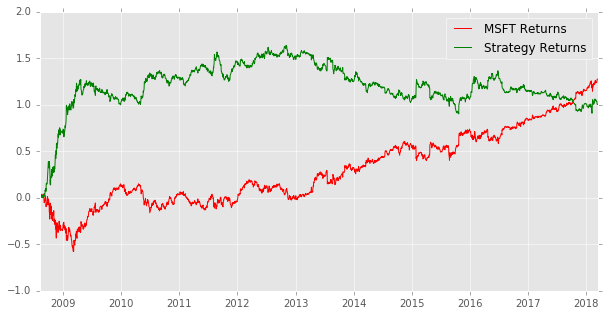

In [42]:
#Create Trading Strategy Using The Model
#We will predict the signal to buy (1) or sell (-1) and calculate the cumulative MSFT returns for test dataset. 
#Next, we will calculate the cumulative strategy return based on the signal predicted by the model in the test dataset. We will also plot the cumulative returns.
df['Predicted_Signal'] = model.predict(X)
df['MSFT_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_MSFT_returns = np.cumsum(df[split:]['MSFT_returns'])
df['Startegy_returns'] = df['MSFT_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_MSFT_returns, color='r',label = 'MSFT Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()
#It can be observed that the Logistic Regression model predict the classes with an accuracy of approximately 50% and generates good returns.

In [ ]:
#https://www.quantinsti.com/blog/machine-learning-logistic-regression-python/
#https://www.quora.com/Which-regression-model-is-best-for-predicting-forecasting-stock-prices
    